In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gp
%matplotlib inline

plt.rcParams['figure.figsize'] = [11, 6]

## Read in Data

In [2]:
# Read in data
data = pd.read_csv('../data/features/merged.csv')
data.columns

Index(['BEAT', 'YEAR', 'COMPLAINTS_POLICE_SHOOTING', 'COMPLAINTS_BLACK',
       'COMPLAINTS_HISPANIC', 'COMPLAINTS_WHITE', 'COMPLAINTS_TOTAL',
       'CRIME_TOTAL', 'CRIME_ARREST', 'CRIME_DOMESTIC', 'ISR_TOTAL_STOPS',
       'ISR_SEARCH', 'ISR_BLACK', 'ISR_WHITE', 'ISR_HISPANIC', 'ISR_ARREST',
       'UOF_TOTAL_COUNT', 'UOF_POLICE_W_WEAPON', 'UOF_POLICE_WO_WEAPON',
       'UOF_HISPANIC', 'UOF_BLACK', 'UOF_WHITE', 'CENSUS_TOTAL POP',
       'CENSUS_WHITE', 'CENSUS_BLACK', 'CENSUS_HISPANIC',
       'CENSUS_MEDIAN INCOME'],
      dtype='object')

In [3]:
# Read in beat boundaries
beats_gdf = gp.read_file('../data/geographies/Boundaries - Police Beats (current).geojson')
beats_gdf.drop(['beat', 'district', 'sector'], axis=1, inplace=True)
beats_gdf.columns = ['BEAT', 'geometry']
beats_gdf['BEAT'] = beats_gdf['BEAT'].astype(int)
beats_gdf.shape

(277, 2)

In [4]:
beats_gdf.dtypes

BEAT           int64
geometry    geometry
dtype: object

In [5]:
for demo in ['BLACK', 'WHITE', 'HISPANIC']:
    demo_cols = [c for c in data.columns if demo in c]
    print(data[demo_cols].mean())

COMPLAINTS_BLACK      3.815117
ISR_BLACK           328.207354
UOF_BLACK            15.541369
CENSUS_BLACK          0.467946
dtype: float64
COMPLAINTS_WHITE     0.462717
ISR_WHITE           37.141982
UOF_WHITE            1.352400
CENSUS_WHITE         0.370621
dtype: float64
COMPLAINTS_HISPANIC     0.689479
ISR_HISPANIC           90.045965
UOF_HISPANIC            2.536261
CENSUS_HISPANIC         0.223661
dtype: float64


## Trends over time

In [6]:
main_cols = ['ISR_TOTAL_STOPS',  'COMPLAINTS_TOTAL', 'UOF_TOTAL_COUNT', 'CRIME_TOTAL']

In [7]:
data['YEAR'] = data['YEAR'].astype(str)

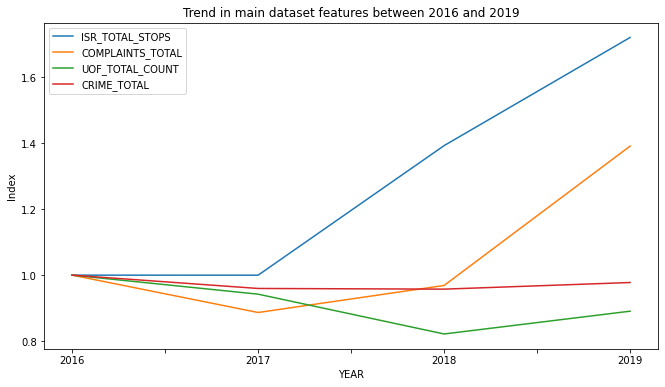

In [8]:
data_grouped = data.groupby(['YEAR'])[main_cols].sum()
first_year = data_grouped[data_grouped.index=='2016']
for col in data_grouped.columns:
    data_grouped[col] = data_grouped[col].apply(lambda x: x / first_year[col])
plot1 = data_grouped.plot()
plt.ylabel('Index')
plt.title('Trend in main dataset features between 2016 and 2019')
plot1.get_figure().savefig('figures/trends_in_features.png', dpi=300)

## Spatial trends

In [9]:
# Sum over all years
data_allyears = data.groupby(['BEAT']).sum().reset_index()

# Merge in beats boundaries
data_beats_gdf = beats_gdf.merge(data_allyears, on='BEAT')

In [10]:
def plot_by_beat(col, title, path):
    plotx = data_beats_gdf.plot(column=col, legend=True)
    plt.xticks([])
    plt.yticks([])
    plt.title(title)
    plotx.get_figure().savefig(path, dpi=300)

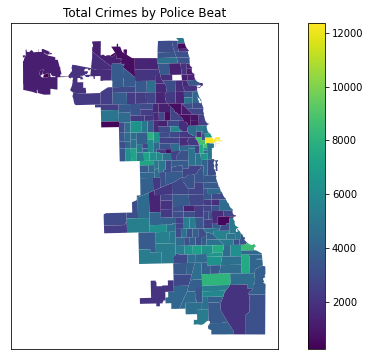

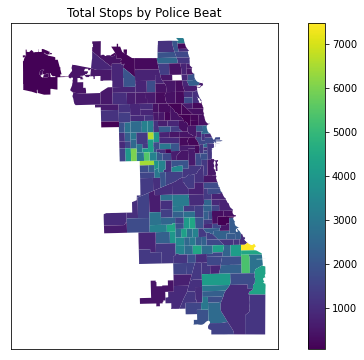

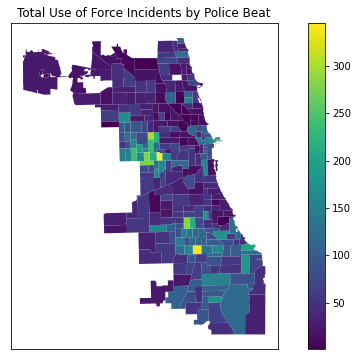

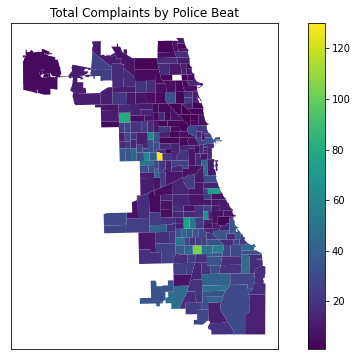

In [11]:
# Plot crimes by beat
fig_list = [('CRIME_TOTAL', 'Total Crimes by Police Beat', 'figures/crimes_by_beatpng'),
            ('ISR_TOTAL_STOPS', 'Total Stops by Police Beat', 'figures/stops_by_beat.png'),
            ('UOF_TOTAL_COUNT', 'Total Use of Force Incidents by Police Beat', 'figures/uof_by_beat.png'),
            ('COMPLAINTS_TOTAL', 'Total Complaints by Police Beat', 'figures/complaints_by_beat.png')]
for col, title, path in fig_list:
    plot_by_beat(col=col,title=title,path=path)

## Demographics

In [12]:
# Data in 2019
data_2019 = data[data['YEAR']=='2019']
data_2019.shape

(253, 27)

/mnt/c/Users/jbleh/Desktop/UChicago/wsl/git/ml_project/env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


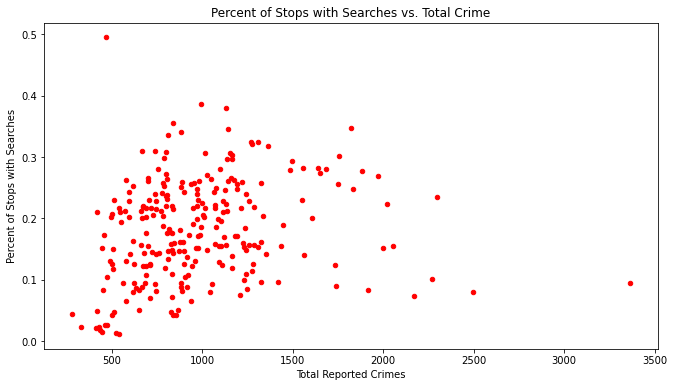

In [14]:
data_2019['ISR_PCT_SEARCH'] = data_2019['ISR_SEARCH'] / data_2019['ISR_TOTAL_STOPS']
plot = data_2019.plot(kind='scatter', x='CRIME_TOTAL', y='ISR_PCT_SEARCH', color='red')
plt.ylabel('Percent of Stops with Searches')
plt.xlabel('Total Reported Crimes')
plt.title('Percent of Stops with Searches vs. Total Crime')
plot.get_figure().savefig('figures/pct_stops_w_searches.png', dpi=300)

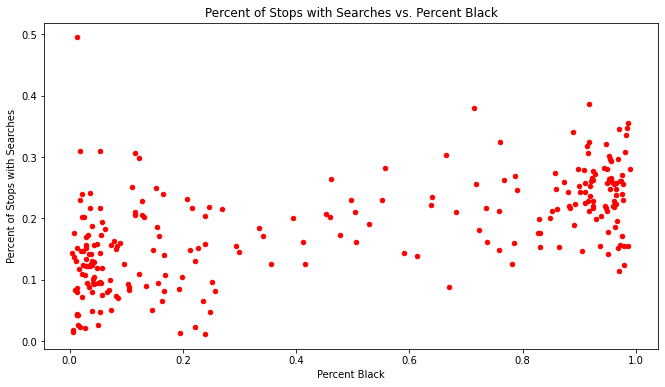

In [15]:
plot = data_2019.plot(kind='scatter', x='CENSUS_BLACK', y='ISR_PCT_SEARCH', color='red')
plt.ylabel('Percent of Stops with Searches')
plt.xlabel('Percent Black')
plt.title('Percent of Stops with Searches vs. Percent Black')
plot.get_figure().savefig('figures/pct_stops_w_searches_black.png', dpi=300)